<h1>Kapitel 3 - Diskreta fördelningar</h1>
Vi kommer här gå igenom några av de fördelningar som vi pratat om under föreläsningen, och hur vi kan implementera och räkna på dem i Python med hjälp av paketet SciPy.<br>
Vi börjar med att importera de paket vi behöver. Den här listan kommer ni känna igen snart.

In [1]:
# Importera nödvändiga paket
import numpy as np
import matplotlib.pyplot as plt

<h3>Generella funktioner i scipy.stats</h3>
Alla fördelningar i SciPy har en rad funktioner kopplade till sig, där vi kan beräkna och ta fram i stort sett alla parametrar vi kan tänkas behöva när vi arbetar med statistik och fördelningar.<br>
Några av de vanligast använda funktionerna är:
<ul>
<li>rvs() - random variates - Den här funktionen ger en NumPy-array med slumpmässiga värden från den givna fördelningen.</li>
<li>pmf() - probability mass function - Den här funktionen beräknar sannolikheten P(X=x) i en given punkt.</li>
<li>cdf() - cumulative distribution function - Den här funktionen beräknar den kumulativa sannolikheten i en given punkt F(x) = P(X <= x).</li>
<li>stats() - Den här funktionen beräknar medelvärde och varians</li>
</ul>

<h3>Binomialfördelningen</h3>
Den första diskreta fördelningen i Lantz är binomialfördelningen. Binomialfördelningen finns i SciPy under beteckningen 'binom'. Vi tar och importerar den.

In [2]:
from scipy.stats import binom # Importera Binomialfördelningen från SciPy.

<h5>Exempel 3-5</h5>
Produktionen av en viss elektronisk komponent kännetecknas av att endast vart 10:e exemplar fungerar som det ska. Funktionen hos varje enskilt exemplar är oberoende av huruvida andra exemplar fungerar. Produktionstakten är två minuter per komponent.
<ol>
    <li>Vad är det förväntade antalet fungerande komponenter av en timmes produktion, och vad är variansen?</li>
    <li>Hur sannolikt är det att man har <strong>exakt</strong> 2 fungerande komponenter efter en timmes produktion?</li>
    <li>Hur sannolikt är det att man har <strong>minst</strong> 2 fungerande komponenter efter en timmes produktion?</li>

Vi börjar med att definiera våra parametrar för vår fördelning. En binomialfördelning har parameterarna n och p.<br>
p är sannolikheten för ett lyckat försök, i det här fallet en fungerande komponent. Eftersom vart 10:e exemplar fungerar som det ska är p = 1/10 = 0.1.<br>
n är antalet försök. I det här fallet ska vi utvärdera över en timma, och produktionstakten är 2 minuter. Därav blir n antalet försök inom en timma, 60/2 = 30.

In [3]:
p = 0.1 # Sannolikheten för ett lyckat exemplar, givet i exemplet.
n = 30 # Antalet producerade komponenter på en timme, givet i exemplet genom 
       # tiden (60 min) dividerat med produktionstiden per komponent (2 min).
       # 60/2 = 30

Uppgift 1. Här använder vi oss av stats() för att beräkna medelvärdet (mean) och variansen (var) för vår fördelningen. När vi kallar på stats() använder vi oss av våra definierade parametrar n och p. Slutligen printar vi ut resultatet.

In [4]:
mean, var = binom.stats(n=n, p=p) # Beräkna medelvärde och varians med binom.stats()

print('Mean: ' + str(mean)) # Printa förväntansvärde n*p
print('Variance: ' + str(var)) # Printa varians 

Mean: 3.0
Variance: 2.7


Uppgift 2. I uppgift 2 skall vi beräkna sannolikheten att vi får utfallet P(X = 2). Vi använder oss av massfunktionen (pmf), och beräknar sannolikheten för vårt utfall k=2.

In [9]:
result = binom.pmf(k=2, n=n, p=p) # Beräkna sannolikhet P(X=2) med pmf()

print(f'P(X=2) = {round(result ,3)}') # Printa resultat

P(X=2) = 0.228


Uppgift 3. I uppgift 3 skall vi beräkna sannolikheten att vi får utfallet P(X >= 2). Genom komplementregeln har vi att P(X>=2) = 1 - P(X<=1). 

P(X<=1) kan vi få från kumulativa fördelningsfunktionen F(1) - som här beräknas av funktionen cmf. 

Vi evaluerar kumulativa fördelningsfunktionen för k=1 och subtraherar sedan det från den totala sannolikheten 1.

In [10]:
result = 1 - binom.cdf(k=1, n=n, p=p) # Beräkna sannolikhet P(X>=2) med cdf()

print(f'P(X>=2) = {round(result, 3)}') # Printa resultat

P(X>=2) = 0.816


**I'll leave this as an excercise for the reader**

c:\Users\Leyla\anaconda3\envs\databehandling\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leyla\anaconda3\envs\databehandling\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leyla\anaconda3\envs\databehandling\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Leyla\anaconda3\envs\databehandling\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

<Axes: >

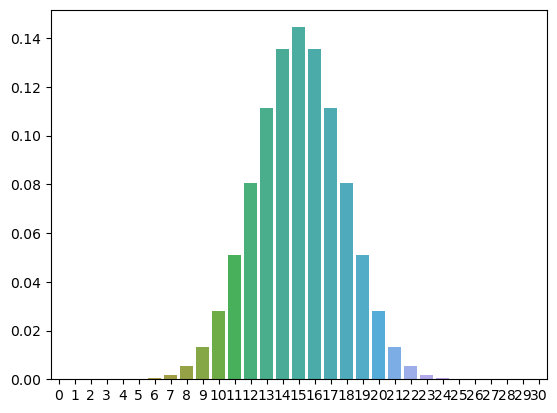

In [14]:
import seaborn as sns

n = 30
p = 0.5

x_vals = [x for x in range(0,31)]
prob_vals = [binom.pmf(k=x, n=n, p=p) for x in range(0,31)]

sns.barplot(x=x_vals, y=prob_vals)
#binom.pmf(k=2, n=n, p=p)

<h3>Poissonfördelningen</h3>
Precis som med binomialfördelningen så finns Poissonfördelningen i SciPy. Vi importerar den för nästa exempel.

In [ ]:
from scipy.stats import poisson # Importera Poissonfördelningen från SciPy.

<h5>Exempel 3-6</h5>
En viss typ av motor till en maskin går sönder var 1000:e gång den startas. Per månad startas motorn 200 gånger.
<ol>
    <li>Hur många gånger går motorn i medeltal sönder per år?</li>
    <li>Hur sannolikt är det att den går sönder <strong>exakt</strong> 3 gånger ett visst år</li>
    <li>Hur sannolikt är det att den går sönder <strong>högst</strong> 1 gång ett visst år?</li>

Vi gör som tidigare att vi först definierar paramterarna för vår fördelning. Formellt sett följer vår data en binomialfördelning med p = 0.001 och n = 2400 (200*12). Men eftersom n > 10, p < 0.1, samt E(X) = 2.4 (alltså mellan 0.1-50) kan vi approximera vår datamängd med en Poissonfördelning med $\mu$ = E(X) = 2.4.

In [ ]:
mu = 2.4 # Sätt mu till E(X) = 2.4

Uppgift 1. Här kan vi, likt den förra uppgiften, använda oss av stats() för att räkna ut medelvärdet. Vi har dock en Posissonfördelning, som definieras utifrån sitt väntevärde $\mu$, så vi behöver egentligen heller göra den här beräkningen, eftersom vi redan har värdet på $\mu$ = 2.4. <br>
Eftersom det är en poissonfördelning kommer medelvärdet och variansen ha samma värde.

In [ ]:
mean, var = poisson.stats(mu=mu) # Beräkna medelvärde och varians med binom.stats()

print(f'Mean: {mean}') # Printa medelvärde
print(f'Variance: {var}') # Printa varians

Uppgift 2. Här behöver vi beräkna sannolikheten P(X=3), det gör vi med massfunktionen pmf().

In [ ]:
result = poisson.pmf(k=3, mu=mu) # Beräkna P(X=3) med pmf()

print(f'P(X=3) = {round(result, 3)}') # Printa resultat

Uppgift 3. Här behöver vi beräkna sannolikheten P(X<=1) vilket fås ur fördelningsfunktionen F(1). Det beräknar vi med hjälp av cmf()

In [ ]:
result = poisson.cdf(k=1, mu=mu) # Beräkna sannolikheten P(X<=1) med cdf()

print(f'P(X<=1) = {round(result,3)}') # Printa resultat

<h3>Geometriska fördelningen</h3>
Geometriska fördelnigen importeras från SciPy som 'geom'.
Dokumentationen för geometriska fördelningen finns <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html>här</a>

In [ ]:
from scipy.stats import geom # Importera geometriska fördelningen med SciPy

<h5>Exempel 3-8</h5>
Kajsa har just tagit sin civilekonomexamen, och tänker börja söka jobb. Hon söker jobb ett och ett, och hon har sannolikheten 0.1 att få jobb vid varje enskild ansökan.
<ol>
    <li>Hur många jobb kan hon förväntas behöva söka innan hon får ett?</li>
    <li>Hur sannolikt är det att hon får jobb på fjärde försöket?</li>
    <li>Hur många jobb måste hon vara beredd på att söka för att vara minst 50% säker på att få jobb?</li>
</ol>
Vi börjar med att bestämma parametrarna för fördelningen. För den geometriska fördelningen är det enkelt, den har en parameter 'p' som bestämmer sannolikheten för ett lyckat försök. I vårt fall är p = 0.1.

In [ ]:
p = 0.1 # Sannolikheten för ett lyckat försök

Uppgift 1. Hur många jobb Kajsa kan förväntas söka innan hon får ett ges av väntevärdet E(X). Det kan vi beräkna m.h.a. stats().

In [ ]:
mean, var = geom.stats(p=p) # Beräkna väntevärdet för X~G(p)

print(f'Mean : {mean}') # Printa resultatet

Uppgift 2. Hur sannolikt det är att Kajsa får jobb på fjärde försöket ges av P(X=4), det beräknar vi ur massfunktionen pmf().

In [ ]:
result = geom.pmf(k=4, p=p) # Beräkna P(X=4)

print(f'P(X=4) = {round(result, 3)}') # Printa resultat

Uppgift 3. Hur många jobb hon måste söka för att vara minst 50% säker på att få ett jobb räknar Lantz ut genom att göra en tabell över alla F(x) tills resultatet blir högre än 0.5. Ett annat sätt att göra det är att lösa uppgiften grafiskt genom att plotta fördelningen och se var F(x) blir högre än 0.5.

In [ ]:
x = np.linspace(0,10,1000) # Generera en array med x-värden från 0-10
y = geom.cdf(k=x, p=p) # Räkna ut värdet på kumulativa fördelningsfunktionen för varje x

fig, ax = plt.subplots() # Skapa en plot med matplotlib
fig.set_figheight(2) # Sätt figurhöjd
fig.set_figwidth(3) # Sätt figurbredd

ax.plot(x,y) # Plotta x vs y
plt.xlabel('Antal sökta jobb') # Sätt label x-axel
plt.ylabel('Sannolikhet') # Sätt label y-axel
plt.show() # Visa plotten

In [19]:
import math

my = 2

def f(x): 
    
    return (1/my)*(math.e**(-x/my))

x_vals = [x for x in range(0,11)]
y_vals = [f(x) for x in range(0,11)]

Vi ser här att sannolikheten når över 0.5 vid ungefär X = 7.

In [33]:
import numpy as np

np.linspace(10,20,100)

array([10.        , 10.1010101 , 10.2020202 , 10.3030303 , 10.4040404 ,
       10.50505051, 10.60606061, 10.70707071, 10.80808081, 10.90909091,
       11.01010101, 11.11111111, 11.21212121, 11.31313131, 11.41414141,
       11.51515152, 11.61616162, 11.71717172, 11.81818182, 11.91919192,
       12.02020202, 12.12121212, 12.22222222, 12.32323232, 12.42424242,
       12.52525253, 12.62626263, 12.72727273, 12.82828283, 12.92929293,
       13.03030303, 13.13131313, 13.23232323, 13.33333333, 13.43434343,
       13.53535354, 13.63636364, 13.73737374, 13.83838384, 13.93939394,
       14.04040404, 14.14141414, 14.24242424, 14.34343434, 14.44444444,
       14.54545455, 14.64646465, 14.74747475, 14.84848485, 14.94949495,
       15.05050505, 15.15151515, 15.25252525, 15.35353535, 15.45454545,
       15.55555556, 15.65656566, 15.75757576, 15.85858586, 15.95959596,
       16.06060606, 16.16161616, 16.26262626, 16.36363636, 16.46464646,
       16.56565657, 16.66666667, 16.76767677, 16.86868687, 16.96

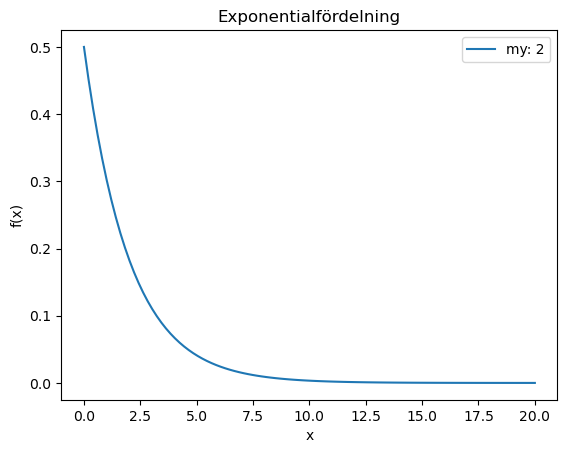

In [75]:
import math

mys = [2]

def f(x, my): 
    
    return (1/my)*(math.e**(-x/my))


for my in mys:

    x_vals = [x for x in np.linspace(0, 20, 100)]
    y_vals = [f(x,my) for x in np.linspace(0, 20 , 100)]

    plt.plot(x_vals, y_vals, label = f'my: {my}')
    plt.legend()

plt.title('Exponentialfördelning')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show();

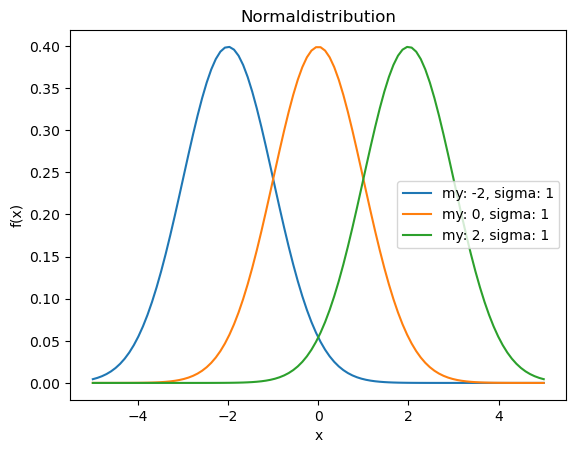

In [84]:
import math

mys = [-2, 0, 2]
sigma = 1

def f(x, my, sigma): 
    
    return math.e**(-0.5*((x-my)/sigma)**2)/(sigma*math.sqrt(2*math.pi))


for my in mys:

    x_vals = [x for x in np.linspace(-5, 5, 100)]
    y_vals = [f(x,my, sigma) for x in np.linspace(-5, 5 , 100)]

    plt.plot(x_vals, y_vals, label = f'my: {my}, sigma: {sigma}')
    plt.legend()

plt.title('Normaldistribution')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show();

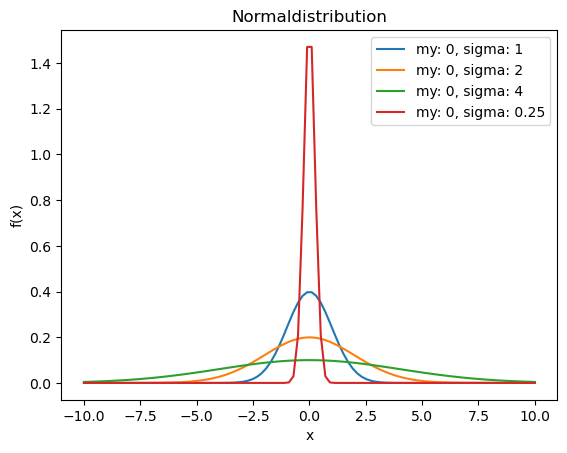

In [88]:
import math

my = 0
sigmas = [1,2,4]

def f(x, my, sigma): 
    
    return math.e**(-0.5*((x-my)/sigma)**2)/(sigma*math.sqrt(2*math.pi))


for sigma in sigmas:

    x_vals = [x for x in np.linspace(-10, 10, 100)]
    y_vals = [f(x,my, sigma) for x in np.linspace(-10, 10 , 100)]

    plt.plot(x_vals, y_vals, label = f'my: {my}, sigma: {sigma}')
    plt.legend()

plt.title('Normaldistribution')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show();

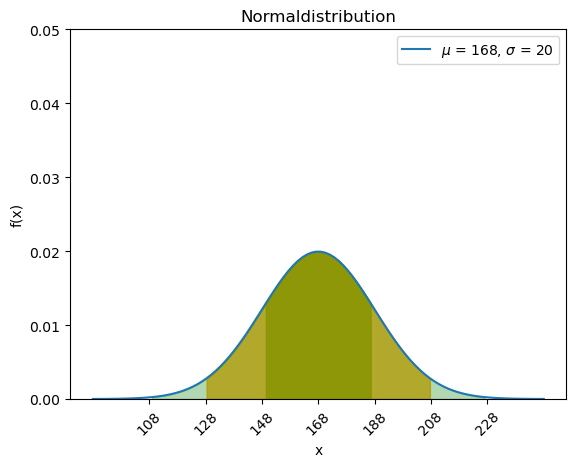

In [136]:
import math

my = 168
sigma = 20

def f(x, my, sigma): 
    
    return math.e**(-0.5*((x-my)/sigma)**2)/(sigma*math.sqrt(2*math.pi))

x_vals = [x for x in np.linspace(my-4*sigma, my+4*sigma, 100)]
y_vals = [f(x,my, sigma) for x in np.linspace(my-4*sigma, my+4*sigma, 100)]

plt.plot(x_vals, y_vals, label = fr'$\mu$ = {my}, $\sigma$ = {sigma}')
plt.legend()

# Shade the area within ±1 standard deviation with one color
plt.fill_between(x_vals, 0, y_vals, where=[(x >= my - sigma) and (x <= my + sigma) for x in x_vals], alpha=0.8, label=r'$\pm 1 \sigma$', color='green')

# Shade the area within ±2 standard deviations with another color
plt.fill_between(x_vals, 0, y_vals, where=[(x >= my - 2 * sigma) and (x <= my + 2 * sigma) for x in x_vals], alpha=0.5, label=r'$\pm 2 \sigma$', color='orange')

# Shade the area within ±2 standard deviations with another color
plt.fill_between(x_vals, 0, y_vals, where=[(x >= my - 2 * sigma) and (x <= my + 2 * sigma) for x in x_vals], alpha=0.5, label=r'$\pm 2 \sigma$', color='orange')

# Shade the area within ±3 standard deviations with another color
plt.fill_between(x_vals, 0, y_vals, where=[(x >= my - 3 * sigma) and (x <= my + 3 * sigma) for x in x_vals], alpha=0.3, label=r'$\pm 3 \sigma$', color='green')

# Set x-ticks for +- 1, 2, and 3 standard deviations
ticks = [my - 3 * sigma, my - 2 * sigma, my - sigma, my, my + sigma, my + 2 * sigma, my + 3 * sigma]
plt.xticks(ticks, rotation=45)

plt.ylim(0,0.05)
plt.title('Normaldistribution')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show();

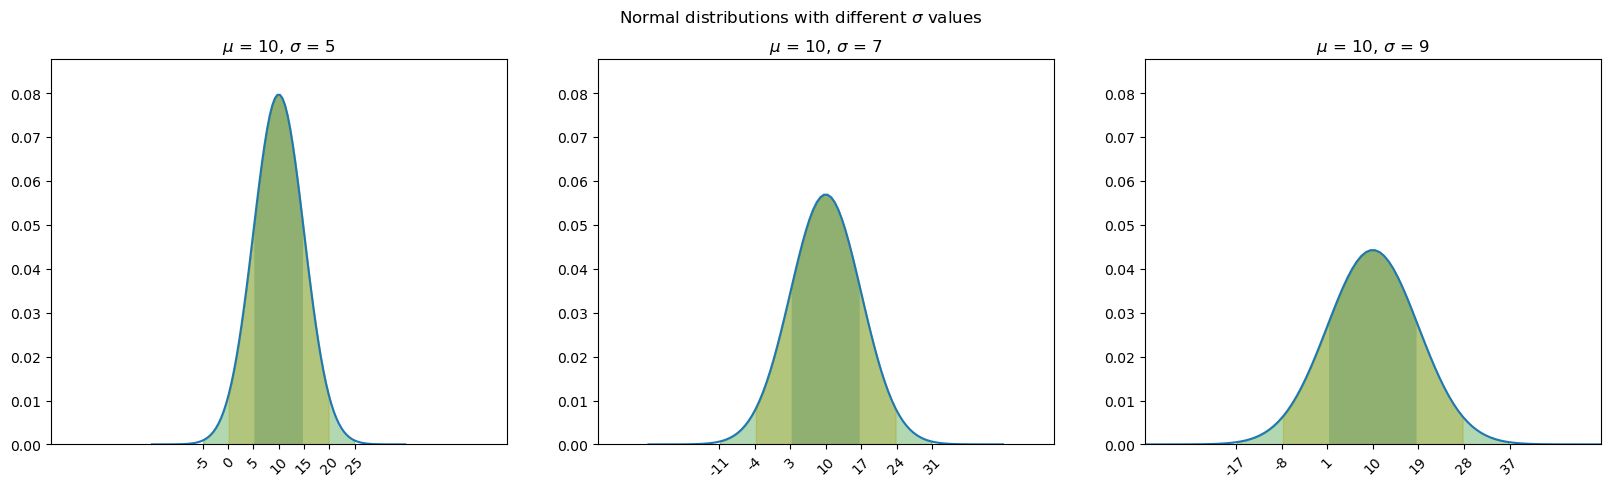

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import math

my = 10
sigmas = [5, 7, 9]  # Different values for sigma

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns for three subplots

y_max = max([f(my, my, sigma) for sigma in sigmas])
x_min = my-5*sigmas[-1]
x_max = my+5*sigmas[-1]


for i, sigma in enumerate(sigmas):
    x_vals = np.linspace(my-5*sigma, my+5*sigma, 100)
    y_vals = [f(x, my, sigma) for x in x_vals]

    label = fr'$\mu$: {my}, $\sigma$: {sigma}'  # Using LaTeX formatting
    axes[i].plot(x_vals, y_vals, label=label)
    
    # Shade the area within ±1 standard deviation with one color
    axes[i].fill_between(x_vals, 0, y_vals, where=[(x >= my - sigma) and (x <= my + sigma) for x in x_vals], alpha=0.3, label=r'$\pm 1 \sigma$')

    # Shade the area within ±2 standard deviations with another color
    axes[i].fill_between(x_vals, 0, y_vals, where=[(x >= my - 2 * sigma) and (x <= my + 2 * sigma) for x in x_vals], alpha=0.3, label=r'$\pm 2 \sigma$', color='orange')

    # Shade the area within ±3 standard deviations with another color
    axes[i].fill_between(x_vals, 0, y_vals, where=[(x >= my - 3 * sigma) and (x <= my + 3 * sigma) for x in x_vals], alpha=0.3, label=r'$\pm 3 \sigma$', color='green')

    #axes[i].legend()

    # Set x-ticks for +- 1, 2, and 3 standard deviations
    ticks = [my - 3 * sigma, my - 2 * sigma, my - sigma, my, my + sigma, my + 2 * sigma, my + 3 * sigma]
    axes[i].set_xticks(ticks)
    axes[i].set_xticklabels(ticks, rotation=45)  # Rotate x-tick labels by 45 degrees

    # Set y-axis limit to start from zero
    axes[i].set_ylim(0, 1.1*y_max)
    axes[i].set_xlim(x_min, x_max)

    axes[i].set_title(f'$\mu$ = {my}, $\sigma$ = {sigma}')

plt.suptitle('Normal distributions with different $\sigma$ values')
plt.show()